## Mount your Drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [2]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


## Access of the dataset

In [3]:
p = Path().cwd()
dataset_dir =  p / "/content/drive/MyDrive/Capstone-2/Lung Cancer Dataset"

In [4]:
images = [] # create an empty list
images_name = [] # create an empty list
labels = [] # create an empty list

In [5]:
target_dict = {
    "Malignant cases": 'Malignant',
    "Bengin cases": 'Bengin',
    "Normal cases": 'Normal',
}

## Resize images

In [6]:
for fldr in dataset_dir.iterdir():
    current_label = target_dict[fldr.name] # get the name of the current label

    if fldr.name == 'Normal cases':
      current_label = "Bengin"

    # print(current_label)
    image_number = 0
    for img in os.listdir(fldr):
        images_name.append(img)

        img = load_img(os.path.join(fldr, img), color_mode='grayscale')
        img_array = img_to_array(img)

        img_array_resized = smart_resize(img_array, (512, 512)) # resize the image to 512 by 512
        img_array_reshaped = np.reshape(img_array_resized, (512, 512)) # reshape the image from (512, 512, 1) to (512, 512)

        images.append(img_array_reshaped)# add reshaped image to list of images
        labels.append(current_label)# add label for this image to the list of labels

        image_number += 1
    print(current_label, '-', image_number)

images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array
print("DONE")

Malignant - 561
Bengin - 416
Bengin - 120
DONE


Normal case (148).jpg


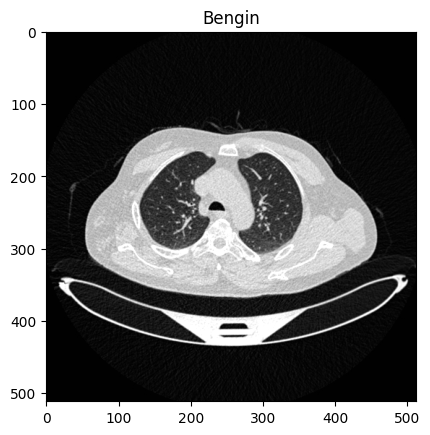

In [7]:
# use plt.imshow() to view a few of the grayscale images
plt.imshow(images[651], cmap='gray')
plt.title(labels[651])
print(images_name[651])

In [8]:
images[651]

array([[38., 38., 38., ..., 38., 38., 38.],
       [38., 38., 38., ..., 38., 38., 38.],
       [38., 38., 38., ..., 38., 38., 38.],
       ...,
       [38., 38., 38., ..., 38., 38., 38.],
       [38., 38., 38., ..., 38., 38., 38.],
       [38., 38., 38., ..., 38., 38., 38.]], dtype=float32)

In [9]:
labels

array(['Malignant', 'Malignant', 'Malignant', ..., 'Bengin', 'Bengin',
       'Bengin'], dtype='<U9')

## Normalization of Images

In [10]:
images = images / 255.0

In [11]:
images[651]

array([[0.14901961, 0.14901961, 0.14901961, ..., 0.14901961, 0.14901961,
        0.14901961],
       [0.14901961, 0.14901961, 0.14901961, ..., 0.14901961, 0.14901961,
        0.14901961],
       [0.14901961, 0.14901961, 0.14901961, ..., 0.14901961, 0.14901961,
        0.14901961],
       ...,
       [0.14901961, 0.14901961, 0.14901961, ..., 0.14901961, 0.14901961,
        0.14901961],
       [0.14901961, 0.14901961, 0.14901961, ..., 0.14901961, 0.14901961,
        0.14901961],
       [0.14901961, 0.14901961, 0.14901961, ..., 0.14901961, 0.14901961,
        0.14901961]], dtype=float32)

## Lebel encoding

In [12]:
# label_dict = {'Malignant': 0, 'Bengin': 1, 'Normal': 2}
label_dict = {'Malignant': 0, 'Bengin': 1}

labels_encoded = np.array([label_dict[label] for label in labels])

In [13]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


## Model building

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 511, 32)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 255, 255, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                        

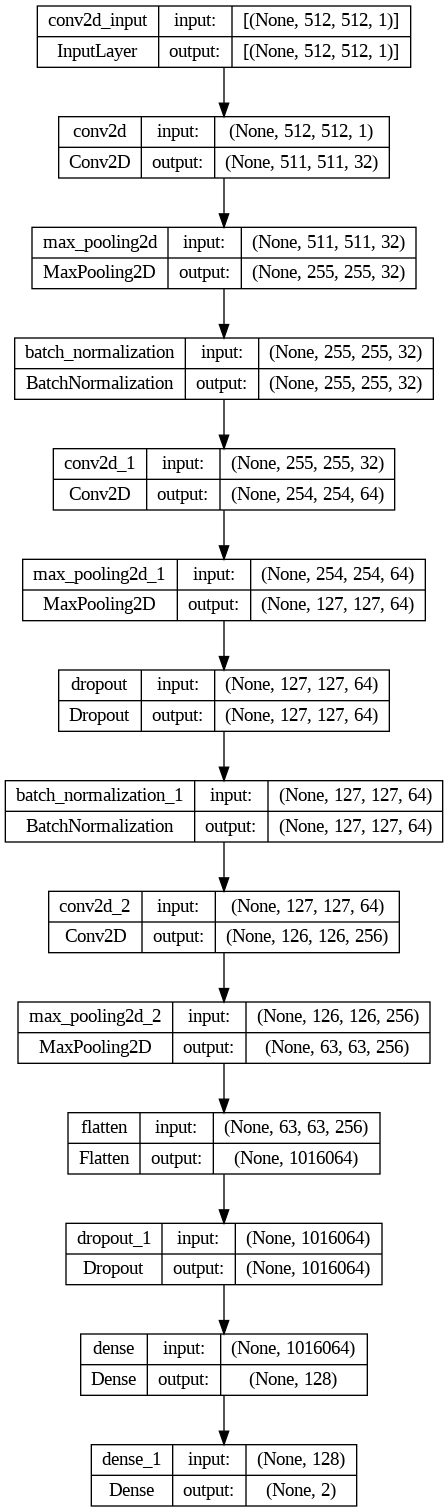

In [17]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='auto')

In [19]:

# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Train the model with early stopping and model checkpoint callbacks
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[ model_checkpoint, early_stopping])

Epoch 1/10
25/25 [==============================] - ETA: 0s - loss: 120.4460 - accuracy: 0.5944

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 57s 2s/step - loss: 120.4460 - accuracy: 0.5944 - val_loss: 0.4267 - val_accuracy: 0.8636
Epoch 2/10
25/25 [==============================] - 14s 568ms/step - loss: 2.5328 - accuracy: 0.8188 - val_loss: 0.5029 - val_accuracy: 0.6477
Epoch 3/10
25/25 [==============================] - 14s 571ms/step - loss: 1.1041 - accuracy: 0.9087 - val_loss: 1.5517 - val_accuracy: 0.5227
Epoch 4/10
25/25 [==============================] - 15s 610ms/step - loss: 0.5775 - accuracy: 0.9366 - val_loss: 2.7035 - val_accuracy: 0.5114


In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

7/7 [==============================] - 2s 284ms/step - loss: 0.4737 - accuracy: 0.8500

Test accuracy: 0.8500000238418579


In [25]:
# from keras.models import load_model

# # Load the best model for prediction
# best_model = load_model('best_model.h5')

# # Evaluate the model
# test_loss, test_acc = best_model.evaluate(X_test, y_test)
# print(f'\nTest accuracy: {test_acc}')

7/7 [==============================] - 1s 71ms/step - loss: 0.4737 - accuracy: 0.8500

Test accuracy: 0.8500000238418579


In [22]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability


7/7 [==============================] - 1s 58ms/step


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred)*100))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       117
           1       1.00      0.68      0.81       103

    accuracy                           0.85       220
   macro avg       0.89      0.84      0.84       220
weighted avg       0.88      0.85      0.84       220

Accuracy of the Model: 85.0%


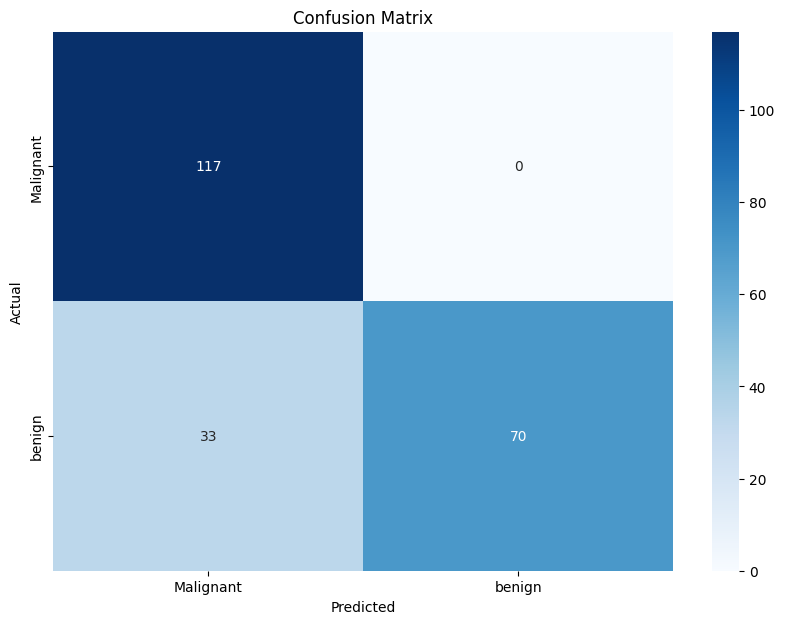

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Malignant', 'benign']

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()